# <h1><center><font color='green'>Financial Trading</font> with Python</center><h1>

# Purpose

This Jupyter notebook is intended to serve as a literal notebook for DataCamp's Financial Trading with Python course, taught by Chelsea Yang

# Table of Contents

### <font color='green'> Chapter 1: Trading Basics</font> 
* Getting trading data 
* Checking and plotting trading data
* Implementing a simple trading strategy with bt

### <font color='green'> Chapter 2: Technical Indicators</font> 
* Getting familiar with technical indicators
* Calculating technical indicators with the TA-Lib library

### <font color='green'> Chapter 3: Trading Strategies</font> 
* Constructing trading signals
* Building signal-based trading strategies and performing strategy backtesting with bt
* Conducting strategy optimization and benchmarking

### <font color='green'> Chapter 4: Performance Evaluation</font> 
* Evaluating strategy performance with risk-adjusted metrics

# Chapter 1: <font color='green'>Trading Basics</font> 

## The concept of financial trading

#### <font color='green'>Financial trading is the buying and selling of financial assets</font>

Various financial instruments to trade:

* <font color='green'>Equities:</font> shares of stocks representing ownership of companies
* <font color='green'>Bonds:</font> debt instruments issued by the government or corporations
* <font color='green'>Forex:</font> foreign exchange market of currencies
* <font color='green'>Commodities:</font> such gold, silver, oil, etc.
* <font color='green'>Cryptocurrencies:</font> such as Bitcoin, Ether, etc. 

## Why people trade

#### <font color='green'>To make a profit by taking calculated risks</font>

* <font color='green'>Long positions:</font> profit from upward price movement (buy security at a low price, sell at a high price)
* <font color='green'>Short positions:</font> profit from downward price movement (sell a (borrowed) security at a higher price, buy it back at a lower price)

Market participants:
* <font color='green'>Institutional traders:</font> such as hedge funds and investment banks; trade in order to hedge financial risks, provide market liquidity, or re-balance their portfolios. 
* <font color='green'>Retail traders:</font> mostly trade for their own accounts

## Trading vs. Investing

| <font color='green'>Trading</font>| <font color='green'>Investing</font>|
| --- | --- |
| Shorter holding period | Longer holding period |
| Focus on short-term trends or market fluctuations | Focus on market fundamentals and long-term trends|
| Take both long and short positions | Take mostly long positions |



Generally, technical traders analyze historical patterns of trading data, and implement trading strategies based on indicators, signals, and rules in order to profit from possible future price movement.

## Financial time series data

<font color='green'>Time series data:</font> a sequence of data points indexed in time order

* Daily data typically includes open, close, and daily high and low prices, as well as volume

* We use <font color='blue'>index_col</font> to specify the "Date" column as the index, and set <font color='blue'>parse_dates</font> to True to parse the index in DateTime format

* The <font color='blue'>head()</font> method displays the top 5 rows of the data

In [1]:
import pandas as pd

# Load the data
bitcoin_data = pd.read_csv('Bitcoin.csv', index_col='Date', parse_dates=True)
bitcoin_data.head()

Open    High     Low   Close     Volume
Date                                                 
2016-12-17  785.17  792.51  784.86  790.83   78989800
2016-12-18  791.01  794.74  788.03  790.53   60524400
2016-12-19  790.69  793.61  790.32  792.71   74886400
2016-12-20  792.25  801.34  791.50  800.88   99629296
2016-12-21  800.64  834.28  799.41  834.28  155576000

## Plotting a line chart of time series data

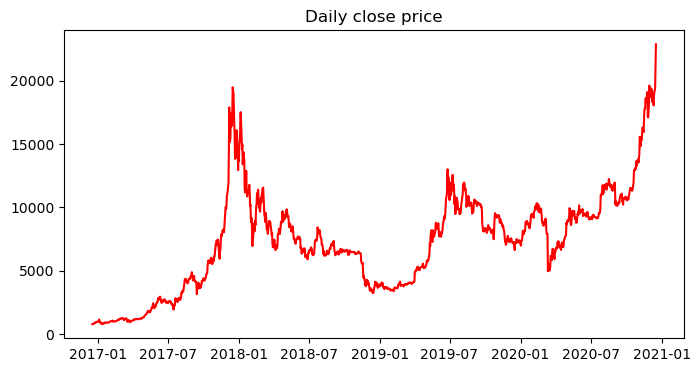

In [2]:
import matplotlib.pyplot as plt
plt_1 = plt.figure(figsize=(8, 4))
plt.plot(bitcoin_data['Close'], color='red')
plt.title('Daily close price');

## Candlestick chart

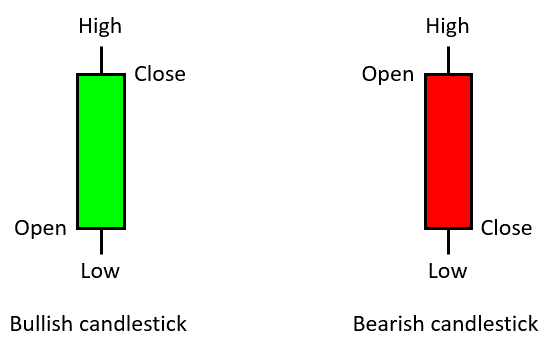


* Each candlestick displays high, open, low, and close
* The color indicates <font color='green'>bullish (rising prices)</font> or <font color='red'>bearish (falling prices)</font> movement
* Typically a white or green candle represents the close price above the open price, and a black or red candle represents the close price below the open price

## Plotting a candlestick chart

In [3]:
import plotly.graph_objects as go

# Define the candlestick
candlestick = go.Candlestick(
x = bitcoin_data.index,
open = bitcoin_data['Open'],
close = bitcoin_data['Close'],
high = bitcoin_data['High'],
low = bitcoin_data['Low'])

# Create the plot
fig = go.Figure(data = [candlestick])
fig.update_layout(title='Bitcoin prices')  

# Show the plot
fig.show()

## Different types of traders

* <font color='green'>Day Trader:</font> holds poisitions throughout the day, but usually not overnight
* <font color='green'>Swing Trader:</font> holds positions from a few days to several weeks
* <font color='green'>Position Trader:</font> hold positions from a few months to several years

## Resampling the data

* Depending on the trading style, you may want to look at the time series data from different intervals, such as hourly, daily, weekly, etc. 
* For example, a swing trader would prefer to have a daily price snapshot instead of one for every hour
* You can use the <font color='blue'>resample</font> method to sample a Python DataFrame 
* The code here demonstrates how to resample hourly data to daily or weekly data by specifying the parameter to be "D" and "W" in <font color='blue'>resample</font> respectively

``` python
# Resample from hourly to daily
eurusd_daily = eurusd_h.resample('D').mean()

# Resample from hourly to weekly
eurusd_weekly = eurusd_h.resample('W').mean()
```

* Typically we downsample from a narrower time frame to a wider time frame, such as from hourly to daily
* This will result in a fewer number of rows
* The sampled data of the wider time frame is the aggregated result of the lower time frame
* In this case, we used the mean, but it could also be the minimum, maximum, or the sum

## Calculating daily returns

* It is also helpful to get familiar with your trading data by checking past returns and volatility
* For example, we can use the <font color='blue'>pct_change()</font> method to calculate percentage change in the price, also known as price return
* It computes the percentage change from the preceding row by default, so if we use daily price data, we will get daily returns



In [4]:
# We will use Bitcoin stocks for this example

# Calculate daily returns
bitcoin_data['daily_return'] = bitcoin_data['Close'].pct_change() * 100

By plotting the results, we can obtain a quick understanding of typical return ranges and the volatility profile of a financial asset

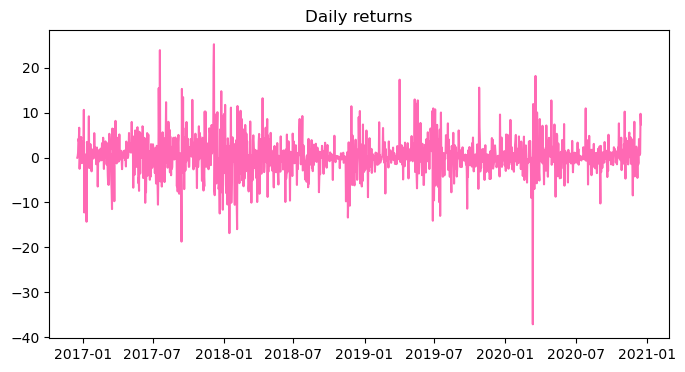

In [5]:
# Plot the data
plt_2 = plt.figure(figsize=(8, 4))
plt.plot(bitcoin_data['daily_return'], color='hotpink')
plt.title('Daily returns');

# Plot a histogram of daily returns

* It is also helpful to plot a histogram of daily price returns
* A histogram is a visual representation of the distribution of the underlying data
* To plot a histogram in Python, call the <font color='blue'>hist</font> method on a DataFrame column
* You can use <font color='blue'>bins</font> to specify how granular you want the chart to be

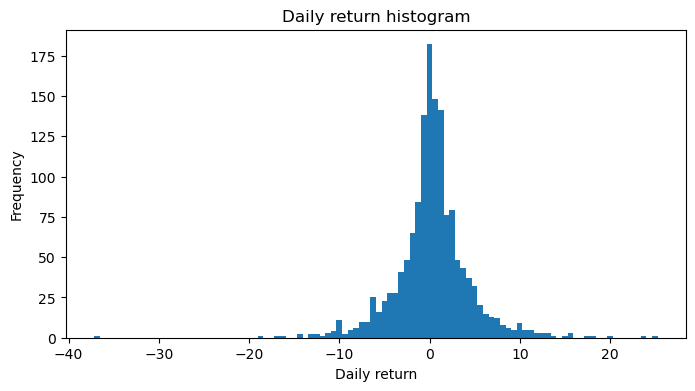

In [6]:
plt_3 = plt.figure(figsize=(8, 4))
bitcoin_data['daily_return'].hist(bins=100, grid=False)
plt.ylabel('Frequency')
plt.xlabel('Daily return')
plt.title('Daily return histogram');

## Data transformation

* The financial market reflects fear, greed, and human behavioral biases
* Thus, market data is inherently noisy and messy
* To make sense of the data, traders perform various data transformations and create <font color='green'>technical indicators </font>  



* A very common indicator is the <font color='green'> simple moving average or SMA </font>  
    * It is the arithmetic mean of the price over a specified period
    * The average is called "moving" because it is always calculated using the <font color='green'> most recent n periods</font>, and therefore moves along with the price on the chart
    * SMA can be easily calculated using <font color='blue'>.rolling.mean()</font> on the price column, and specify the averaging period with the argument <font color='blue'>window = n</font>

In [7]:
bitcoin_data['sma_50'] = bitcoin_data['Close'].rolling(window=50).mean()

## Plotting the rolling average

* We can plot the SMA and the price in one chart
* The plot includes a legend and shows that the moving average has a smoothing effect on the price

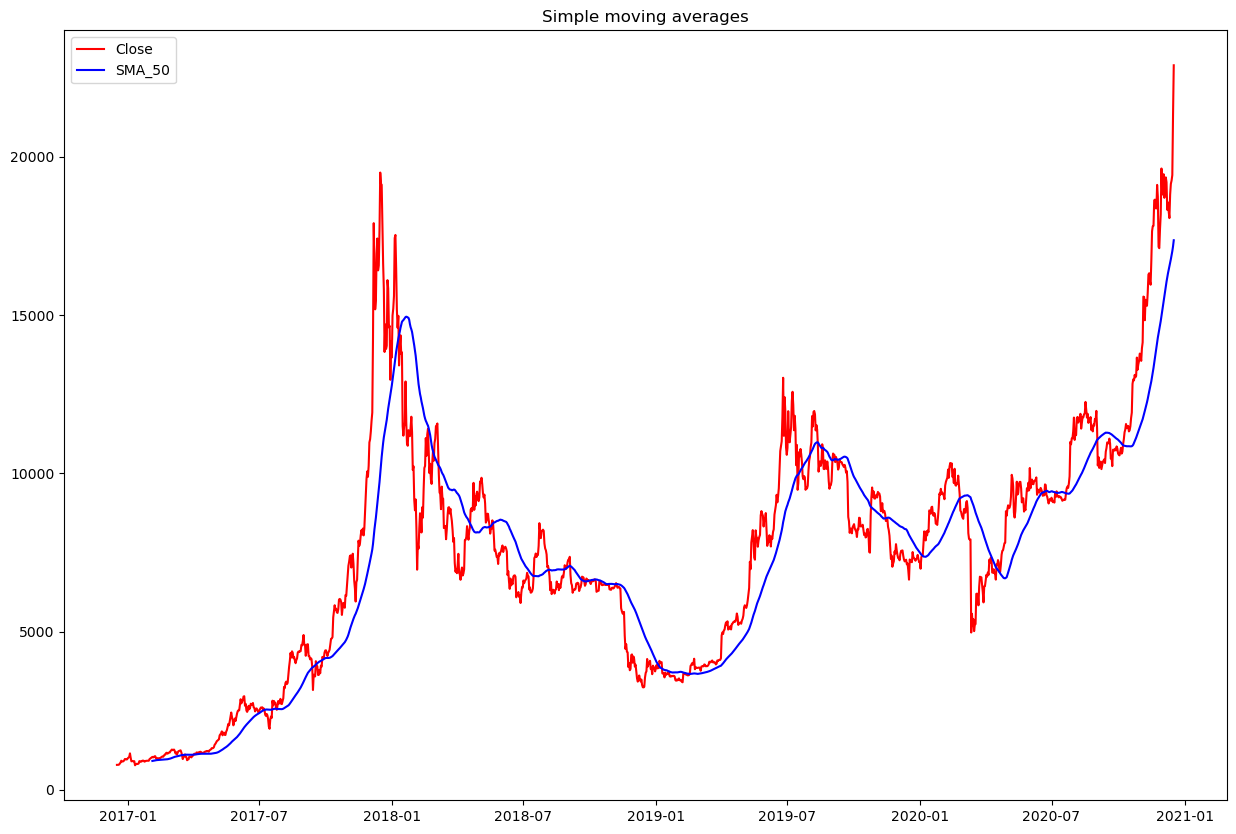

In [8]:
plt_4 = plt.figure(figsize=(15, 10))

# Plot price
plt.plot(bitcoin_data['Close'], label='Close', color='red')

# Plot SMA
plt.plot(bitcoin_data['sma_50'], label='SMA_50', color='blue')

# Add title
plt.title('Simple moving averages')

# Create legend
plt.legend();

## The bt package

<font color='blue'>bt:</font> a flexible framework for defining and backtesting trading strategies

* <font color='green'>Strategy:</font> a method of buying and selling financial assets based on predefined rules
*  <font color='green'>Strategy backtesting:</font> a way to assess the effectiveness of a strategy by testing it on historical data

Note: Documentation can be found here https://pmorissette.github.io/bt/

In [9]:
# Import the package
import bt

## The bt process

* Step 1: Get the historical price data
* Step 2: Define the strategy
* Step 3: Backtest the strategy with the data
* Step 4: Evaluate the result

## Getting the data

* One option is to load data contained in a CSV file
* With bt, we can also use its get function to fetch data online directly
    * By default, it downloads the "Adjusted Close" prices from Yahoo Finance by tickers 
    * A <font color='green'>ticker</font> is an abbreviated identifier for a public-traded stock, and the "Adjusted Close" price is adjusted for events like corporate actions such as stock splits, dividends, etc.
    * Prices of multiple securities can be downloaded at once by specifying multiple tickers within a single string separated by commas 
    * Use <font color='blue'>start</font> and <font color='blue'>end</font> to specify the start date and end date.

In [10]:
# For some reason, bt is unable to read the data. Use the code in the following cell instead.

#bt_data = bt.get('goog, amzn, tsla',
                 #start='2020-6-1', end='2020-12-1')
#bt_data.head()

In [11]:
import yfinance as yf
data = yf.download('goog, amzn, tsla', start="2020-06-01", end="2020-12-1")
data = data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
data

[*********************100%***********************]  3 of 3 completed


Adj Close                       
                  AMZN       GOOG        TSLA
Date                                         
2020-06-01  123.552002  71.591003   59.873333
2020-06-02  123.620499  71.960999   58.770668
2020-06-03  123.919998  71.819000   58.863998
2020-06-04  123.029999  70.609001   57.625332
2020-06-05  124.150002  71.919502   59.043999
...                ...        ...         ...
2020-11-23  154.919495  86.742996  173.949997
2020-11-24  155.903000  88.444000  185.126663
2020-11-25  159.253494  88.571503  191.333328
2020-11-27  159.766998  89.659500  195.253326
2020-11-30  158.401993  88.037003  189.199997

[128 rows x 3 columns]

## Defining the strategy

* Next we define our strategy with <font color='blue'>bt.Strategy</font>
* The <font color='blue'>Strategy</font> contains trading logics by combining various <font color='blue'>algos</font>
* This unique feature of bt allows us to easily create strategies by mixing and matching different algos, each of which acts like a small task force that performs a specific operation
* Within Strategy we first assign a name, then we define a list of algos in the square brackets 
    * The first algo specifies when to execute trades; here we specify a simple rule to execute trades every week using <font color='blue'>RunWeekly</font>
    * The second algo specifies what data the strategy will apply to, for simplicity we apply to all the data using <font color='blue'>SelectAll</font>
    * The third algo specifies, in the case of multiple assets, what weights apply to each asset; here <font color='blue'>WeighEqually</font> means, for example, if we have two stocks, we will always allocate equal amounts of capital to each stock 
    * The last algo specifies that it will re-balance the asset weights according to what we have specified in the previous step, using <font color='blue'>.Rebalance()</font>

* We now have a strategy that will execute trades weekly on a portfolio that holds several stocks
* It will sell a stock that has risen in price and redistribute the profit to buy a stock that has fallen in price, maintaining an equal amount of holdings in each stock

In [12]:
# Define the strategy
bt_strat = bt.Strategy('Trade_Weekly',
                      [bt.algos.RunWeekly(), # Run weekly
                      bt.algos.SelectAll(), # Use all data
                      bt.algos.WeighEqually(), # Maintain equal weights
                      bt.algos.Rebalance()]) # Rebalance

## Backtesting

* Now we can perform backtesting
* Use <font color='blue'>bt.Backtest()</font> to combine the data and previously defined strategy, and create a "backtest"
* Call <font color='blue'>bt.run()</font> to run the backtest and save the result

In [13]:
# Create a backtest
bt_test = bt.Backtest(bt_strat, data)

# Run the backtest
bt_res = bt.run(bt_test)

## Evaluating the result

We can use <font color='blue'>.plot()</font> to plot and review the result

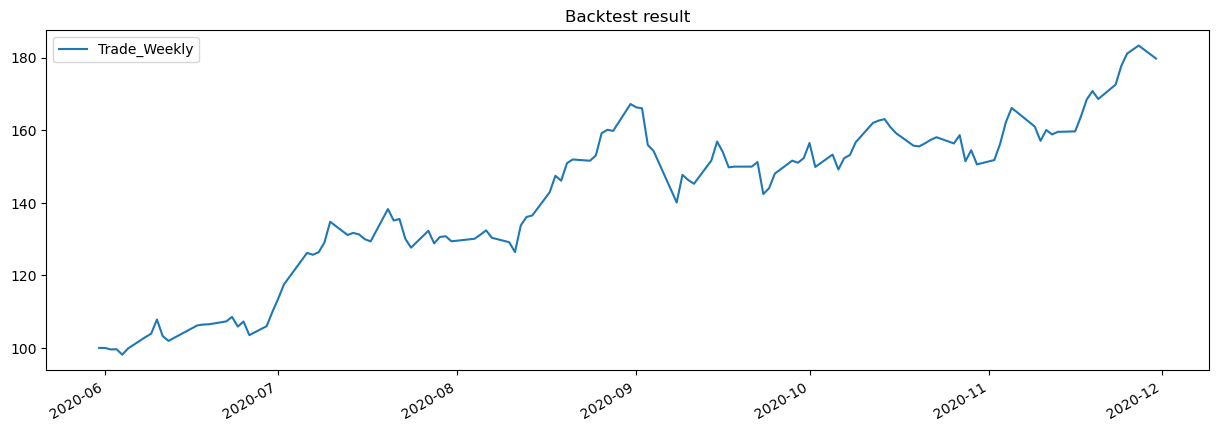

In [14]:
# plot the result
bt_res.plot(title='Backtest result');

The line chart shows that if we applied this strategy to trade Google, Amazon, and Tesla stocks weekly, buying and selling them to maintain an equal weighted stock portfolio, then in these six months during 2020 our portfolio would have increased from 100 to 180

We can also use <font color='blue'>get_transactions()</font> to print out the transaction details

In [15]:
# This is also not working.

# Get trade details
#bt_res.get_transactions()

# Chapter 2: <font color='green'>Technical Indicators</font> 

## What are technical indicators?

* Mathematical calculations based on historical market data, such as price, volumes, etc.
* Help traders gain insight into past price patterns and anticipate possible future price movements
* #### <font color='green'>Assumption:</font> The market is efficient and prices have incorporated all public information, such as financial news or public policies

## Types of indicators

* <font color='green'>Trend indcators:</font> measure the direction or strength of a trend
    * Examples: Moving Average (MA), Average Dimensional Movement Index (ADX)
* <font color='green'>Momentum indcators:</font> measure the velocity of price movement, i.e. the rate of change in an upward or downward direction 
    * Example: Relative Strength Index (RSI)
* <font color='green'>Volatility indcators:</font> measure the magnitude of price deviations
    * Example: Bollinger Bands

## The TA-Lib Package

#### <font color='green'>TA-Lib: Technical Analysis Library</font> 
* Includes 150+ technical indicator implementations
* Documentation can be found here: https://github.com/TA-Lib/ta-lib-python

In [16]:
import talib

## Moving average indicators

* <font color='green'>SMA:</font> Simple Moving Average
* <font color='green'>EMA:</font> Exponential Moving Average

* Characteristics:
    * Called "moving" averages because every average value is calculated using data points of the <font color='green'>most recent n periods</font>, and hence moves along with the price
    * Calculating the averages creates a smoothing effect which helps to give a clearer indication of which direction the price is moving - upward, downward, or sideways
    * Moving averages calculated based on a longer lookback period have more smoothing effects than a shorter one

## Simple Moving Average (SMA) - Trend Indicator


* An <font color='green'>SMA</font> is the <font color='green'>arithmetic mean</font> of the <font color='green'>past n prices</font> 
* <font color='green'>N</font> is a chosen number of periods for calculating the mean

<font color='darkgreen'>
$$
  SMA = \frac{(P_1 + P_2 + ... + P_n)}{n}
$$
</font> 

* Earlier, we calculated SMA with the <font color='blue'>.rolling.mean()</font> method of a DataFrame
* With talib, we can simply call <font color='blue'>talib.SMA()</font> and pass the DataFrame column, in this case the Close price
* Use the <font color='blue'>timeperiod</font> parameter to specify the averaging period
* Note that since an n-period SMA needs at least n data points to calculate the first average value, we will get NA values for the first $n-1$ rows
* Instead, we can use the <font color='blue'>.tail()</font> method to check the last 5 rows

In [17]:
# We will once again use Bitcoin stocks for this example

# Calculate two SMAs
bitcoin_data['SMA_short'] = talib.SMA(bitcoin_data['Close'], timeperiod=10)
bitcoin_data['SMA_long'] = talib.SMA(bitcoin_data['Close'], timeperiod=50)

# Print the last 5 rows
bitcoin_data.tail()

Open      High       Low     Close       Volume  daily_return  \
Date                                                                            
2020-12-13  18806.77  19381.54  18734.33  19142.38  25450468637      1.801351   
2020-12-14  19144.49  19305.10  19012.71  19246.64  22473997681      0.544655   
2020-12-15  19246.92  19525.01  19079.84  19417.08  26741982541      0.885557   
2020-12-16  19418.82  21458.91  19298.32  21310.60  44409011479      9.751827   
2020-12-17  22674.05  23586.91  21237.53  22885.93  67490234368      7.392237   

                sma_50  SMA_short    SMA_long  
Date                                           
2020-12-13  16763.1054  18753.574  16763.1054  
2020-12-14  16887.4148  18808.261  16887.4148  
2020-12-15  17014.2514  18834.546  17014.2514  
2020-12-16  17167.3790  19031.094  17167.3790  
2020-12-17  17359.6718  19400.524  17359.6718

## Plotting the SMA

* We can plot SMAs together with the price with <font color='blue'>matplotlib</font>
* The label is added to indicate each data series

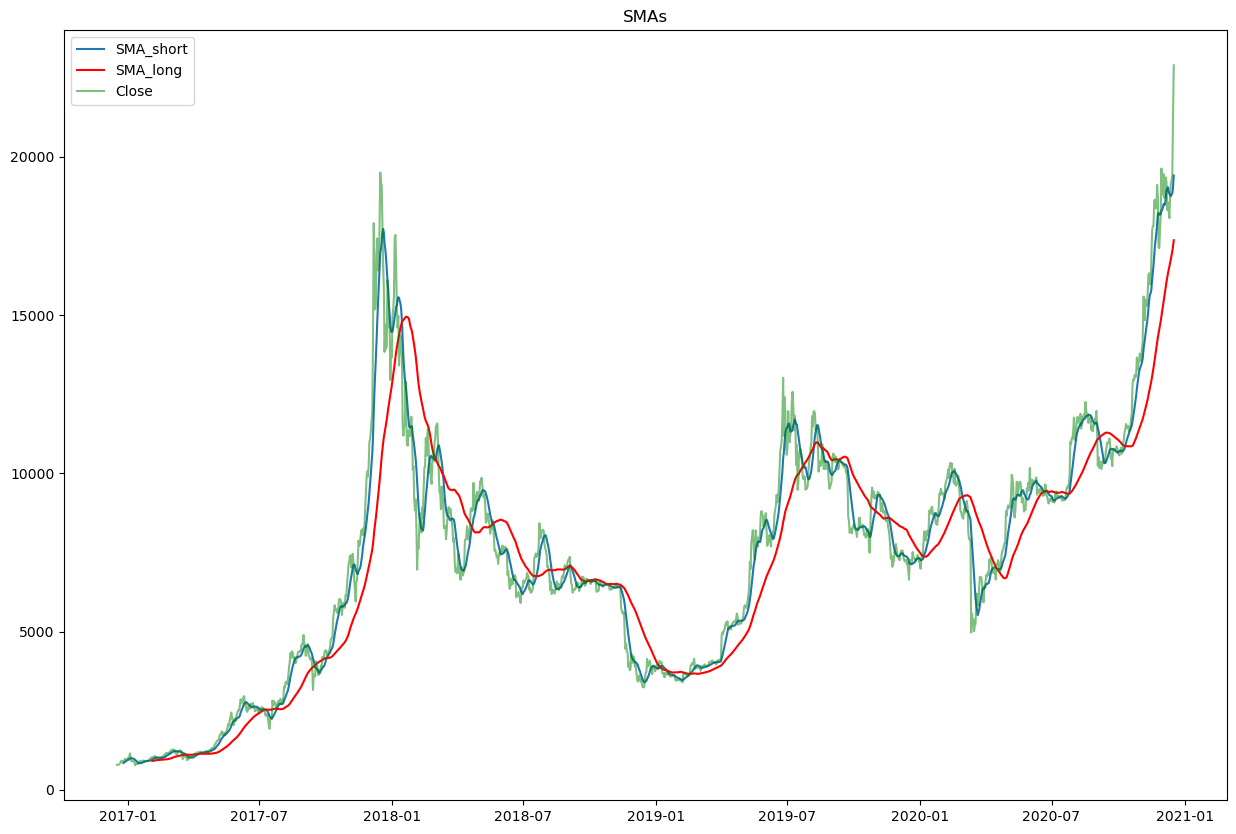

In [18]:
plt_5 = plt.figure(figsize=(15, 10))

# Plot SMA with the price
plt.plot(bitcoin_data['SMA_short'], label='SMA_short')
plt.plot(bitcoin_data['SMA_long'], label='SMA_long', color='red')
plt.plot(bitcoin_data['Close'], label='Close', color='green', alpha=0.5)

# Customize and show the plot
plt.legend()
plt.title('SMAs');

* The <font color='blue'>blue line</font> is the SMA calculated with a shorter lookback period, and it traces the price movement closely
* The <font color='red'>red line</font>  is the SMA calculated with a longer lookback period, and is smoother and less responsive to the price fluctuations

## Exponential moving average (EMA) - Trend Indicator

* An <font color='darkgreen'>EMA</font> is an exponentially weighted average of the <font color='darkgreen'>last n prices</font>, where the weight decreases exponentially with each previous price

<font color='darkgreen'>
$$
  EMA_n = P_n \times multiplier + previous \space EMA \times (1 - multiplier) \newline
  multiplier = \frac{2}{n+1}
$$
</font> 

* To implement an EMA with talib, call <font color='blue'>talib.EMA()</font> and pass the DataFrame column as input, in this case the Close price
* Similarly, specify the averaging period with the <font color='blue'>timeperiod</font> parameter

In [19]:
# Calculate two EMAs
bitcoin_data['EMA_short'] = talib.EMA(bitcoin_data['Close'], timeperiod=10)
bitcoin_data['EMA_long'] = talib.EMA(bitcoin_data['Close'], timeperiod=50)

# Print the last 5 rows
bitcoin_data.tail()

Open      High       Low     Close       Volume  daily_return  \
Date                                                                            
2020-12-13  18806.77  19381.54  18734.33  19142.38  25450468637      1.801351   
2020-12-14  19144.49  19305.10  19012.71  19246.64  22473997681      0.544655   
2020-12-15  19246.92  19525.01  19079.84  19417.08  26741982541      0.885557   
2020-12-16  19418.82  21458.91  19298.32  21310.60  44409011479      9.751827   
2020-12-17  22674.05  23586.91  21237.53  22885.93  67490234368      7.392237   

                sma_50  SMA_short    SMA_long     EMA_short      EMA_long  
Date                                                                       
2020-12-13  16763.1054  18753.574  16763.1054  18699.634459  16873.007995  
2020-12-14  16887.4148  18808.261  16887.4148  18799.090012  16966.091603  
2020-12-15  17014.2514  18834.546  17014.2514  18911.451828  17062.208796  
2020-12-16  17167.3790  19031.094  17167.3790  19347.660587  17228.812372  
2020-12-17  17359.6718  19400.524  17359.6718  19990.982298  17450.660122

## Plotting the EMA

The EMA can be plotted in essentially the same way as the SMA

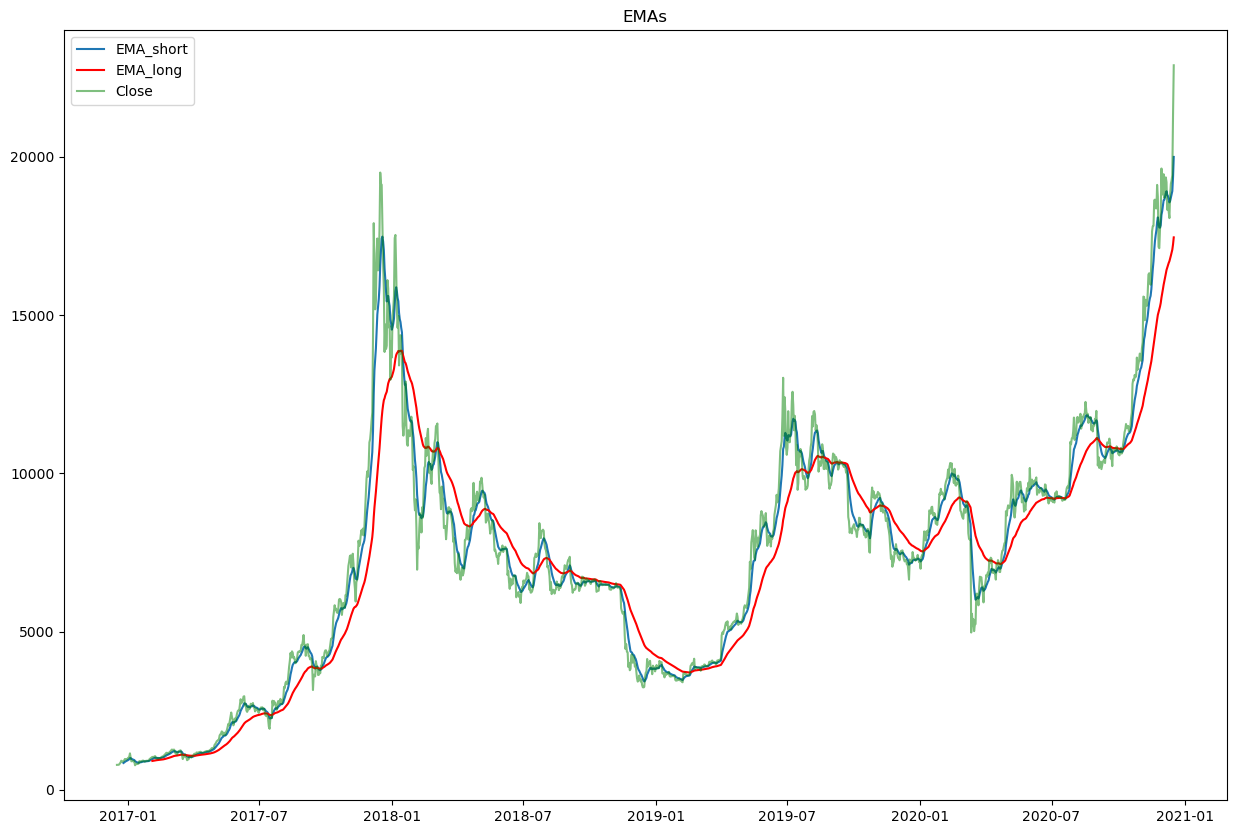

In [20]:
plt_6 = plt.figure(figsize=(15, 10))

# Plot EMA with the price
plt.plot(bitcoin_data['EMA_short'], label='EMA_short')
plt.plot(bitcoin_data['EMA_long'], label='EMA_long', color='red')
plt.plot(bitcoin_data['Close'], label='Close', color='green', alpha=0.5)

# Customize and show the plot
plt.legend()
plt.title('EMAs');

As with SMAs, we see when plotting EMAs and the price data, the <font color='blue'>shorter EMA in blue</font> is more reactive to the price movement compared to the <font color='red'>longer EMA in red</font>

## SMA vs. EMA

The main difference between SMAs and EMAs is that EMAs give higher weight to the more recent data, while SMAs assign equal weight to all data points

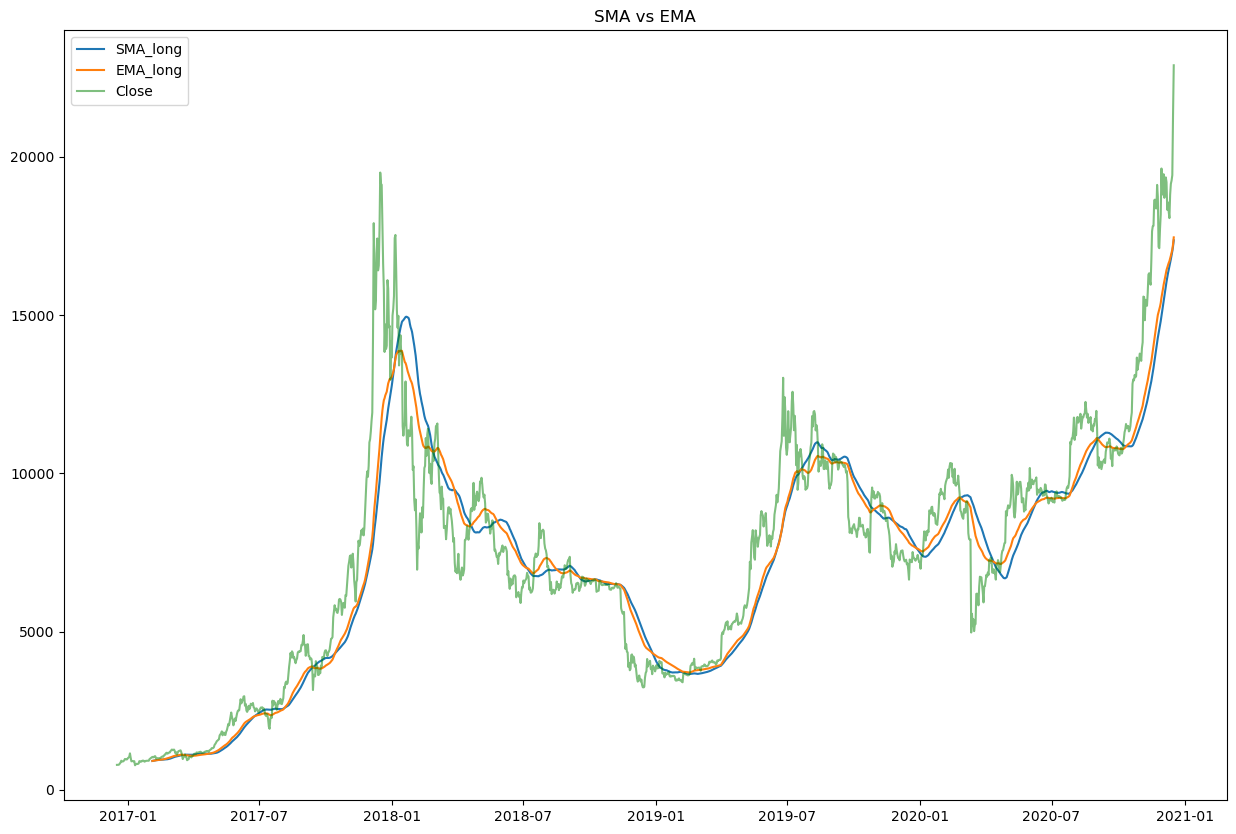

In [21]:
plt_7 = plt.figure(figsize=(15, 10))

# Plot SMA and EMA with the price
plt.plot(bitcoin_data['SMA_long'], label='SMA_long')
plt.plot(bitcoin_data['EMA_long'], label='EMA_long')
plt.plot(bitcoin_data['Close'], label='Close', color='green', alpha=0.5)

# Customize and show the plot
plt.legend()
plt.title('SMA vs EMA');

As shown in the plot above containing EMA and SMA (calculated with the same lookback window), whenever the price makes a big change, the <font color='darkorange'>EMA in the orange line</font> is more sensitive to the price move compared to the <font color='blue'>SMA in the blue line</font>

## ADX - Trend Indicator

* <font color = 'green'> ADX </font> stands for <font color = 'green'> "Average Directional Movement Index"</font>
* Developed by J. Welles Wilder
* It was created with the intention to measure the <font color = 'green'>strength of a trend</font> objectively
* ADX can indicate whether an asset price is trending or merely moving sideways
* However, it does not tell the direction of a trend, that is <font color = 'green'>bullish (rising prices)</font> or <font color = 'red'>bearish (falling prices)</font>
* ADX oscillates between <font color = 'green'> 0 and 100 </font> 
* In general:
    * <font color='green'>ADX $<=25$</font> indicates the <font color='green'>market is going sideways and has no clear trend</font>
    * <font color='green'>ADX $>25$</font> indicates the <font color='green'>market is trending</font>
    * <font color='green'>ADX $>50$</font> suggests a <font color='green'>strong trending market</font>

## Calculating ADX 

* ADX is derived from two other indicators: <font color = 'green'>$+DI$</font> and <font color = 'green'>$-DI$</font>. 
    * <font color = 'green'>$+DI$ (plus directional index):</font> quantifies the presence of an uptrend
    * <font color = 'green'>$-DI$ (minus directional index):</font> quantifies the presence of a downtrend
* ADX is the <font color='green'>smoothed averages</font> of the difference between $+DI$ and $-DI$
* The calculation input for ADX includes the high, low and close prices of each period

## Implementing ADX in Python

* ADX can be implemented in Python by calling <font color='blue'>talib.ADX()</font>, and passing three types of price data as input: the high, low and close price
* Originally Welles Wilder used a <font color='green'>14-period</font> lookback window for ADX calculations, which became the industry standard (also the default value for the timeperiod parameter of talib.ADX())
* You can change the default period with the <font color='blue'>timeperiod</font> parameter
* Note that the longer the lookback window, the less sensitive the ADX is to the price fluctuations
    * I.e., a 14-day ADX is more sensitive to daily price changes than a 21-day ADX
* Sometimes traders change the lookback period to suit their trading time horizons
    * For example, a position trader who holds a trading position for several months would likely use a longer lookback period

* In the code below, we calculate ADX and save it in a new DataFrame column
* We can use <font color='blue'>.tail()</font> to check the last 5 rows

In [22]:
# We will once again use Bitcoin stocks for this example

# Calculate ADX
bitcoin_data['ADX'] = talib.ADX(bitcoin_data['High'], bitcoin_data['Low'], bitcoin_data['Close'])

# Print the last five rows
bitcoin_data.tail()

Open      High       Low     Close       Volume  daily_return  \
Date                                                                            
2020-12-13  18806.77  19381.54  18734.33  19142.38  25450468637      1.801351   
2020-12-14  19144.49  19305.10  19012.71  19246.64  22473997681      0.544655   
2020-12-15  19246.92  19525.01  19079.84  19417.08  26741982541      0.885557   
2020-12-16  19418.82  21458.91  19298.32  21310.60  44409011479      9.751827   
2020-12-17  22674.05  23586.91  21237.53  22885.93  67490234368      7.392237   

                sma_50  SMA_short    SMA_long     EMA_short      EMA_long  \
Date                                                                        
2020-12-13  16763.1054  18753.574  16763.1054  18699.634459  16873.007995   
2020-12-14  16887.4148  18808.261  16887.4148  18799.090012  16966.091603   
2020-12-15  17014.2514  18834.546  17014.2514  18911.451828  17062.208796   
2020-12-16  17167.3790  19031.094  17167.3790  19347.660587  17228.812372   
2020-12-17  17359.6718  19400.524  17359.6718  19990.982298  17450.660122   

                  ADX  
Date                   
2020-12-13  29.554256  
2020-12-14  28.955107  
2020-12-15  28.657884  
2020-12-16  30.012427  
2020-12-17  32.259940

## Plotting ADX

* Usually, an ADX plot is placed horizontally under a price plot, so we can observe the price and indicator changes together along the same timeline
* This can be accomplished by using the <font color='blue'> matplotlib subplots</font> function
* In the code below, we create a set of subplots, ax1 and ax2, to plot the price and ADX separately
* We can also use <font color='blue'> set_ylabel</font>  to label the y axis of each subplot for more clarity

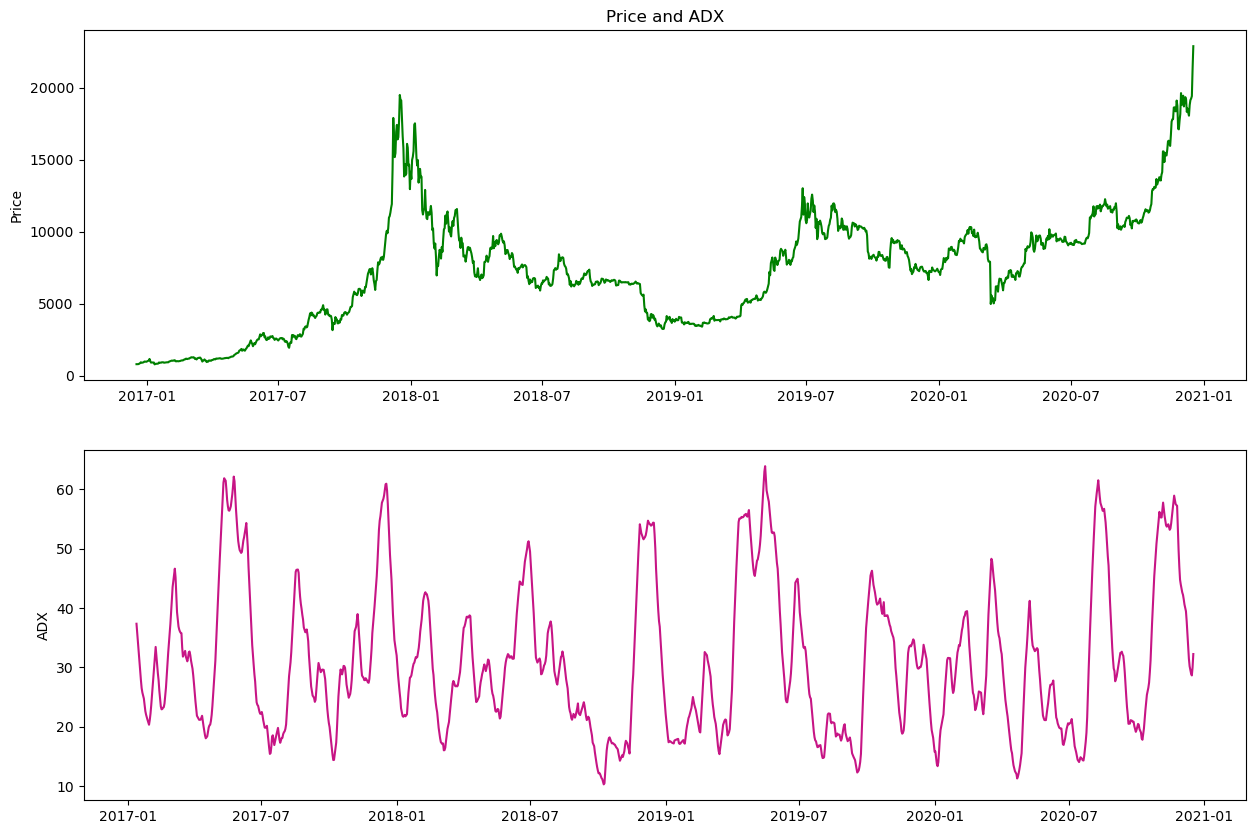

In [23]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 10))

# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(bitcoin_data['Close'], color='green');
ax2.set_ylabel('ADX')
ax2.plot(bitcoin_data['ADX'], color='mediumvioletred');

ax1.set_title('Price and ADX');

* Notice that in the chart above, the <font color='green'>ADX starts to rise when the price is steadily trending up</font>
* The <font color='green'>ADX starts to decline when the uptrend in price is stalling</font> and <font color='green'>price is moving sideways</font>

## RSI - Momentum Indicator

* <font color='green'>RSI</font> stands for <font color='green'>"Relative Strength Index"</font>
* Also developed by Welles Wilder
* RSI has been the most popular indicator used to measure <font color='green'>momentum</font>, which is the <font color='green'>speed of rising or falling in prices</font>

* RSI oscillates between <font color='green'>0 and 100</font>
    * <font color='green'>RSI $>70$</font> indicates an <font color='green'>overbought market condition, which means the asset is overvalued and the price may reverse</font>
    * <font color='green'>RSI $<30$</font> suggests an <font color='green'>oversold market condition, which means the asset is undervalued and the price may rally</font>

## Calculating RSI 

The RSI calculation follows a straightforward formula:
<font color='darkgreen'>
$$
RSI = 100 - \frac{100}{1+RS}
$$
</font>

where:

* RS, or Relative Strength, is the <font color='green'>average of the upward price changes</font> over a chosen <font color='green'> n periods</font>, divided by the <font color='green'>average of downward price changes</font> over those <font color='green'>n periods</font>
* The formula is constructed in such a way that an RSI is bounded between 0 and 100

## Implementing RSI in Python

* RSI can be implemented in Python by calling <font color='blue'>talib.RSI()</font> and passing the price column
* Similar to the ADX, Welles Wilder used a <font color='green'>14-period</font> lookback window for RSI calculations, which became the industry standard (also the default value for the timeperiod parameter for talib.RSI())
* You can change the default period with the <font color='blue'>timeperiod</font> parameter 
* Note that the longer the lookback window, the less sensitive the RSI is to the price fluctuations
* Traders may want to change the default time period to suit their specific trading time horizons, or as a variable input for testing different trading strategies 
* In the code below, we calculated the RSI and saved it in a new DataFrame column
* We can use <font color='blue'>.tail()</font> to check the last 5 rows

In [24]:
# We will once again use Bitcoin stocks for this example

# Calculate RSI
bitcoin_data['RSI'] = talib.RSI(bitcoin_data['Close'])

# Print
bitcoin_data.tail()

Open      High       Low     Close       Volume  daily_return  \
Date                                                                            
2020-12-13  18806.77  19381.54  18734.33  19142.38  25450468637      1.801351   
2020-12-14  19144.49  19305.10  19012.71  19246.64  22473997681      0.544655   
2020-12-15  19246.92  19525.01  19079.84  19417.08  26741982541      0.885557   
2020-12-16  19418.82  21458.91  19298.32  21310.60  44409011479      9.751827   
2020-12-17  22674.05  23586.91  21237.53  22885.93  67490234368      7.392237   

                sma_50  SMA_short    SMA_long     EMA_short      EMA_long  \
Date                                                                        
2020-12-13  16763.1054  18753.574  16763.1054  18699.634459  16873.007995   
2020-12-14  16887.4148  18808.261  16887.4148  18799.090012  16966.091603   
2020-12-15  17014.2514  18834.546  17014.2514  18911.451828  17062.208796   
2020-12-16  17167.3790  19031.094  17167.3790  19347.660587  17228.812372   
2020-12-17  17359.6718  19400.524  17359.6718  19990.982298  17450.660122   

                  ADX        RSI  
Date                              
2020-12-13  29.554256  58.961661  
2020-12-14  28.955107  59.677408  
2020-12-15  28.657884  60.878627  
2020-12-16  30.012427  71.158273  
2020-12-17  32.259940  76.654386

## Plotting RSI

* Similar to the ADX, it is helpful to plot the price and the RSI one above another
* In the code below, we created two subplots, the top plot shows the price, and the bottom plot shows the RSI

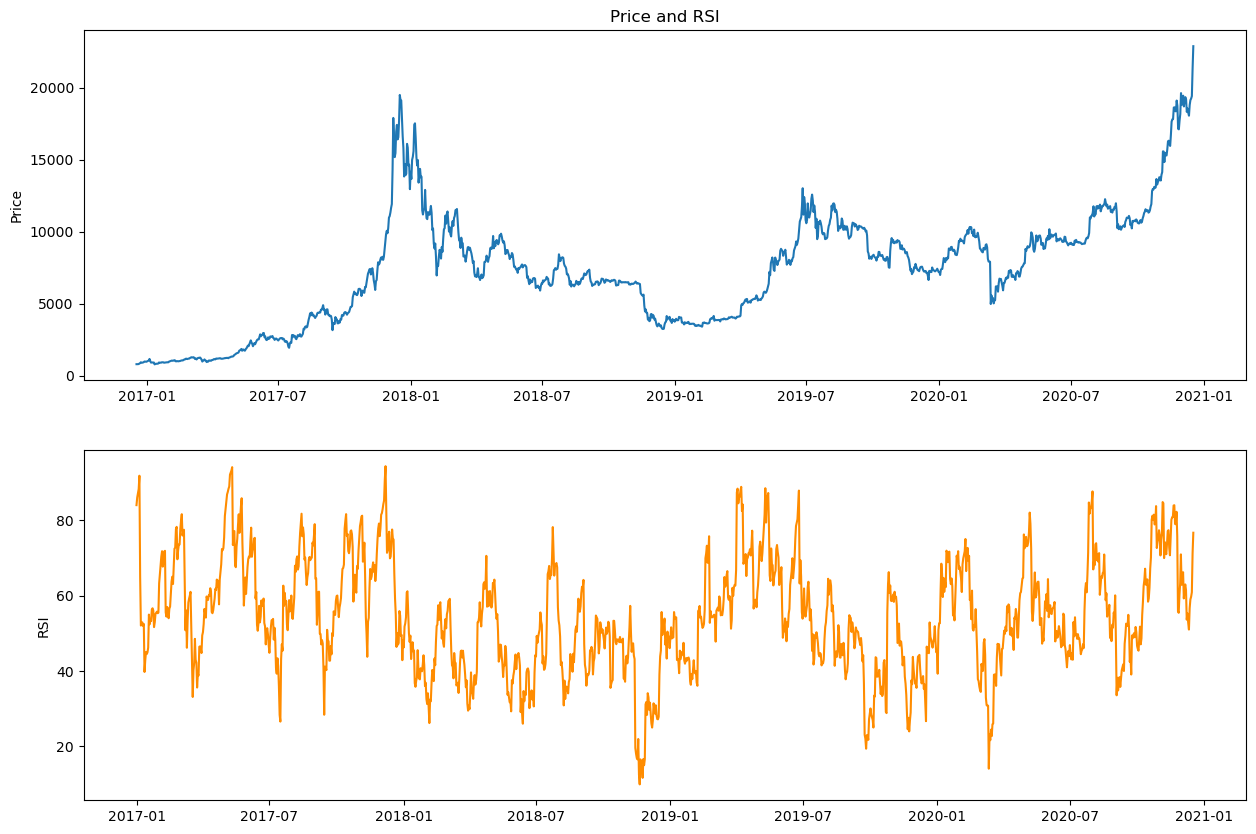

In [25]:
# Create subplots
fig, (ax3, ax4) = plt.subplots(2, figsize=(15, 10))

# Plot ADX with the price
ax3.set_ylabel('Price')
ax3.plot(bitcoin_data['Close']);
ax4.set_ylabel('RSI')
ax4.plot(bitcoin_data['RSI'], color='darkorange');

ax3.set_title('Price and RSI');

* Notice that in the chart above, when the <font color='green'>RSI is falling near 30</font>, the <font color='green'>price bottoms out</font> and <font color='green'>gradually recovers</font>
* When the <font color='green'>RSI value is approaching 70</font>, the <font color='green'>price reaches new highs</font> and is <font color='green'>more likely to pull back</font>

## Bollinger Bands - Volatility Indicator

* Bollinger Bands were developed by John Bollinger 
* Bollinger bands are designed to gauge <font color='green'>price volatility</font>, that is, <font color='green'>price deviations from the mean</font>
* Bollinger Bands are composed of three lines: 
    * a <font color='green'>middle band</font> which is an <font color='green'>n-period simple moving average line</font>, where <font color='green'>$n = 20$</font> by default
    * an <font color='green'>upper</font> and <font color='green'>lower band</font> that are <font color='green'> drawn k standard deviations above and below the middle band</font>, where <font color='green'>$k = 2$</font> by default
* The parameters <font color='green'>n</font> and <font color='green'>k</font> can be changed
* Traders may choose the n and k to suit their trading time horizons and strategy needs
    * For example, a trader may choose 10-period moving average and 1.5 standard deviations for a shorter-term strategy, or a 50-period moving average and 2.5 standard deviations for a longer-term strategy

## Bollinger Bands: implications

* Since the upper and lower bands are calculated based on standard deviations from the mean price, they adjust to volatility swings in the underlying price 
* <font color='green'>The wider the Bollinger Bands, the more volatile the asset prices</font>
* In addition, Bollinger Bands intend to answer the question: <font color='green'>is the price too high or too low on a relative basis?</font>
    * Statistically speaking, if the upper and lower bands are based on <font color='green'>1 standard deviation</font>, they contain about <font color='green'>68% of the recent price moves</font>
    * Similarly, if the bands are based on <font color='green'>2 standard deviations</font>, they contain about <font color='green'>95% of recent price moves</font>
    * In other words, the price only moves out of the upper or lower bands in <font color='green'>5% of the cases</font> 
    * Hence, we can say:
        * the price is <font color='green'>relatively expensive when it is close to the upper band </font>
        * the price is <font color='green'>relatively cheap when it is close to the lower band</font>

## Implementing Bollinger Bands in Python

* Bollinger Bands can be implemented in Python by calling <font color='blue'>talib.BBANDS()</font> and passing the DataFrame column, in this case, the Close price
* Specify the lookback period with the <font color='blue'>timeperiod</font> parameter, which is 20 by default
* Also, use <font color='blue'>nbdevup</font> and <font color='blue'>nbdevdn</font> to specify the number of standard deviations away from the middle band for the upper and lower band respectively, which is 2 by default
* It produces three output Series, which are, respectively, the upper band, the middle moving average line, and the lower band
    * These can be saved in separate variables

In [26]:
# We will once again use Bitcoin stocks for this example

# Define the Bollinger Bands
upper, mid, lower = talib.BBANDS(bitcoin_data['Close'], timeperiod=20)

## Plotting Bollinger Bands

Bollinger Bands are commonly plotted on top of the price as the code below demonstrates

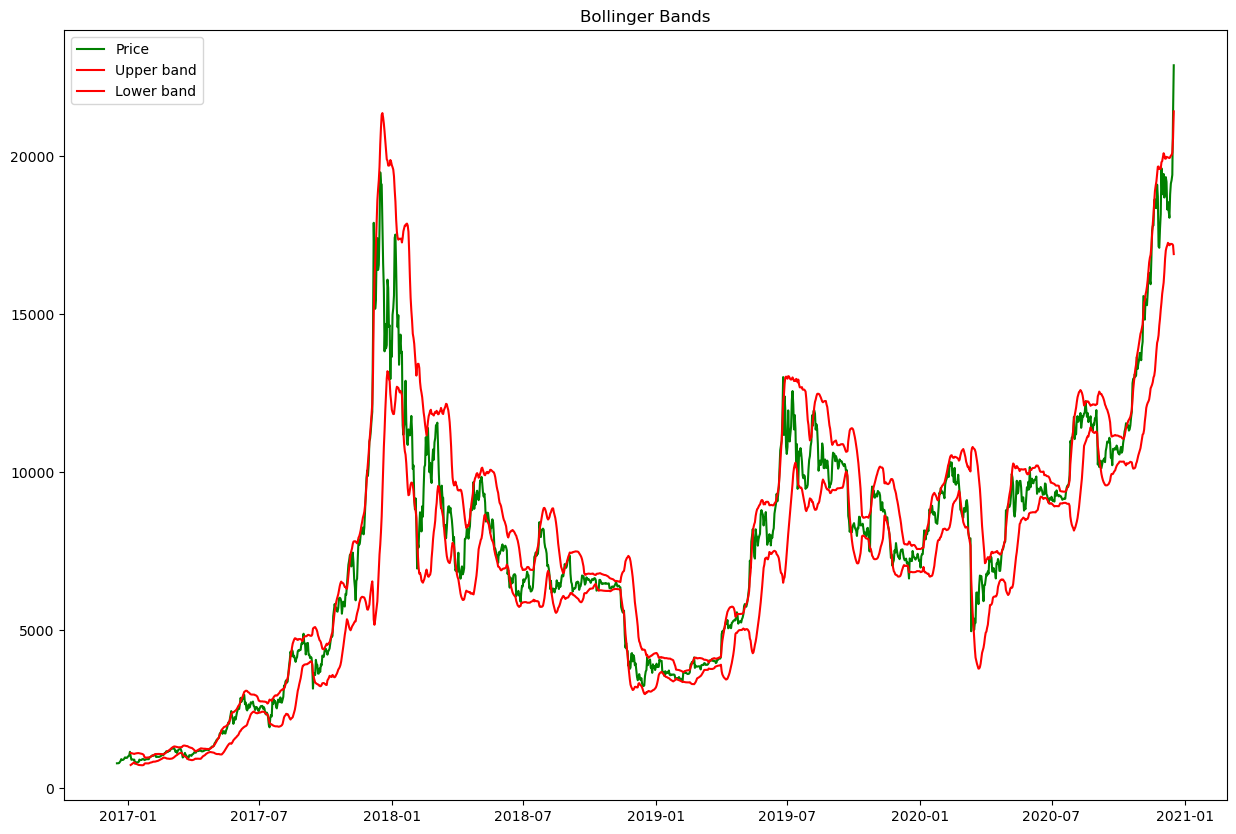

In [27]:
plt_8 = plt.figure(figsize=(15, 10))

# Plot the Bollinger Bands
plt.plot(bitcoin_data['Close'], label='Price', color='green')
plt.plot(upper, label='Upper band', color='red')
#plt.plot(mid, label='Middle band', color ='darkorange')
plt.plot(lower, label='Lower band', color='red')

# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend();

* As we can see from the plot above, the Bollinger Bands <font color='green'>become wider</font> when the <font color='green'> price has big upward or downward swings</font>
* When the <font color='green'>green price data</font> gets closer to the <font color='red'>red upper</font> or <font color='red'>red lower band</font>, it <font color='green'>tends to reverse temporarily before continuing the original upward or downward movement</font>

# Chapter 3: <font color='green'>Trading Strategies</font>

## What are trading signals?

* <font color='green'>Trading signals</font> are triggers to <font color='green'>long (buy)</font> or <font color='green'>short (sell)</font> financial assets based on predetermined criteria
* They can be constructed using one technical indicator, multiple technical indicators, or a combination of market data and indicators
* Trading signals are commonly used in <font color='green'>algorithmic trading</font>, where trading strategies make decisions based on quantitative rules, and remove human discretion

## A signal example

* Here is an example of a simple signal
* It is constructed by <font color='green'>comparing the price with its n-period simple moving average</font>, or <font color='green'>SMA</font>

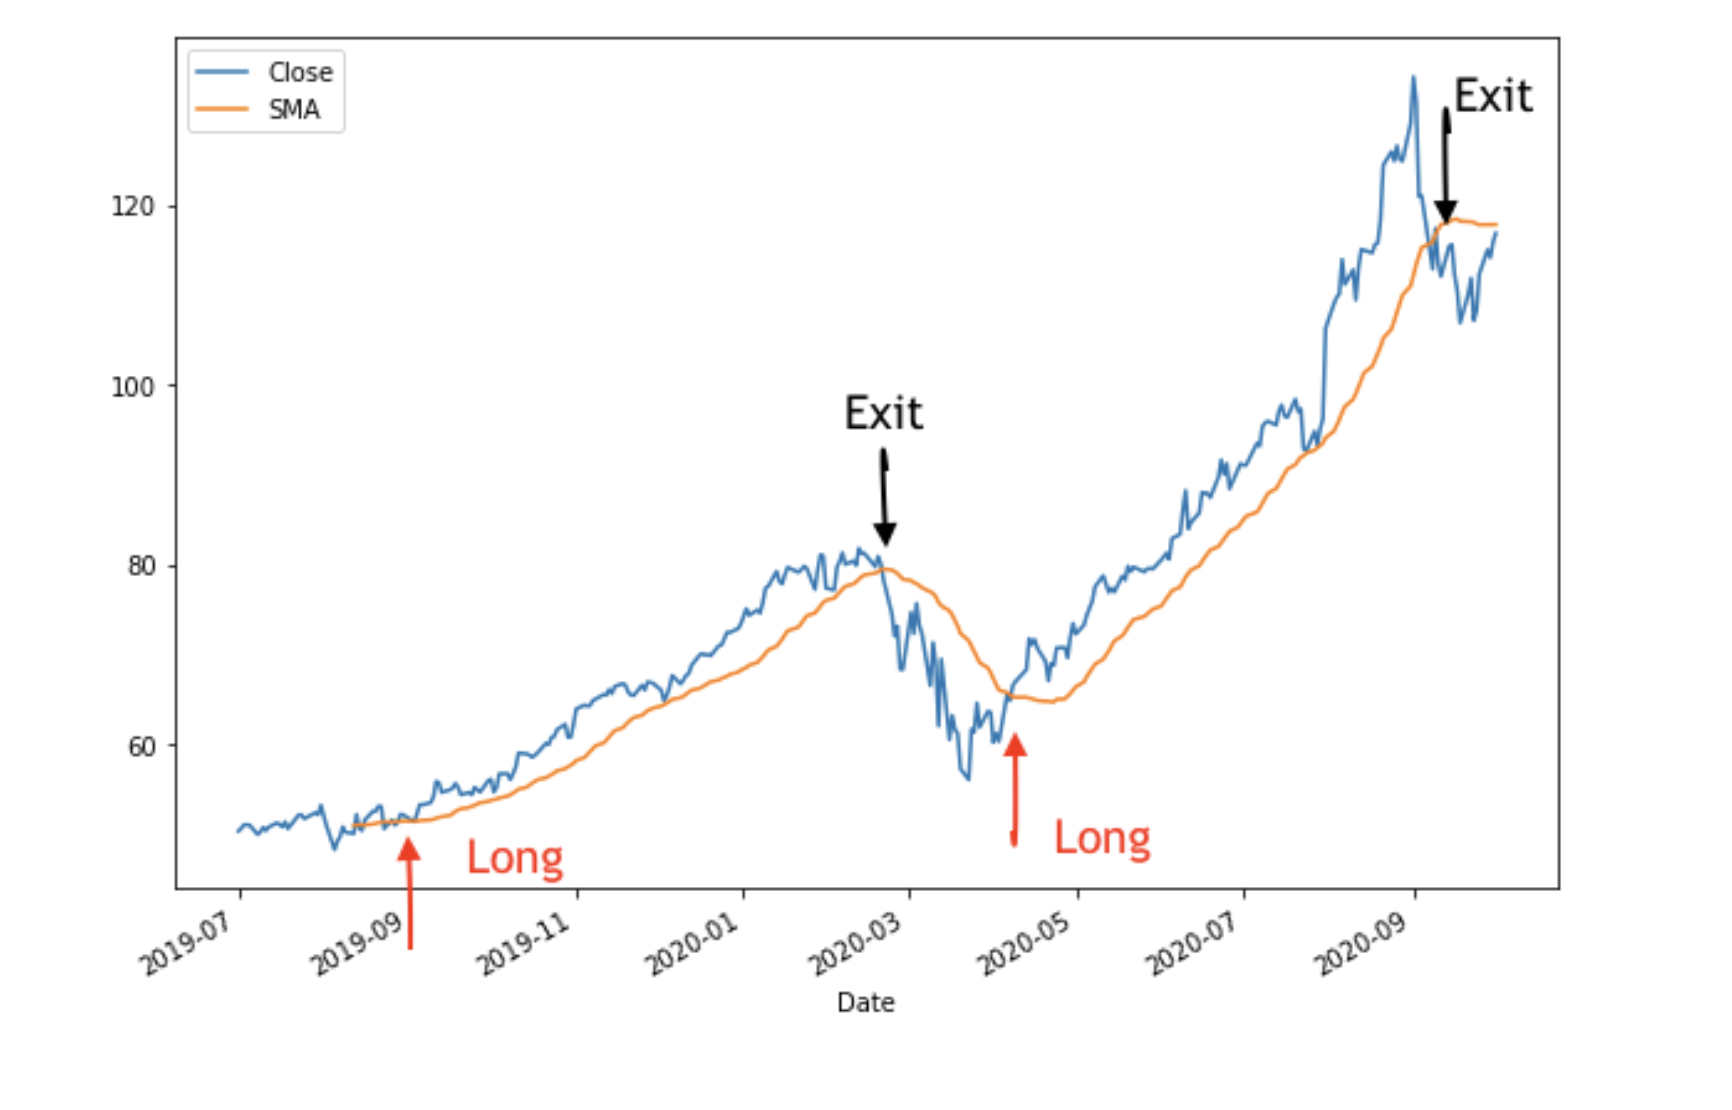

<font color='green'>A long signal</font> is triggered to <font color='green'>buy the asset</font> when its <font color='green'>price rises above the SMA</font>, and <font color='green'>exit the long trade</font> when its <font color='green'>price drops below the SMA</font>

## How to implement signals in bt

1. Get the data and calculate indicators
2. Define the signal-based strategy
    * <font color='blue'>bt.algos.SelectWhere()</font>
    * <font color='blue'>bt.algos.WeighTarget()</font>
3. Create and run a backtest
4. Review the backtest result

## Constructing the signal

* Let's build a signal based strategy with bt step by step using the <font color='green'>price</font> and <font color='green'>SMA based</font> signal previously mentioned as an example 
* First, we need to obtain the price data and calculate the moving average indicator
* Here we use <font color='blue'>bt.get()</font> to download the stock price data directly online
* To calculate the SMA, we can apply <font color='blue'>.rolling.mean()</font> to the price data

In [28]:
# bt still cannot read the data, run the code in the next cell instead

# Get price data by the stock ticker
# price_data = bt.get('aapl', start='2019-11-1', end='2020-12-1')

In [29]:
# Note: We are using Apple stocks for this example

# Get price data
price_data = yf.download('aapl', start='2019-07-1', end='2020-12-2')
price_data = price_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

# Calculate SMA
sma = price_data.rolling(20).mean()

[*********************100%***********************]  1 of 1 completed


Alternatively, we can use the <font color='blue'>talib library's SMA function</font>

In [30]:
# Calculate SMA
# sma = talib.SMA(price_data['Close'], timeperiod=20)

## Defining a signal-based strategy

* Now let's apply the signal to the strategy
* This is handled by algos <font color='blue'>SelectWhere</font>
    * It takes the argument $Price > SMA$, which essentially is a Boolean DataFrame containing selection logic
    * If the <font color='green'>condition is true</font>, that is the price rises above the SMA, a <font color='green'>long signal is triggered to enter long positions of the asset</font>
    * There are a few simplifications to this strategy that are worth noting:
        * First, we will use the strategy for <font color='green'>trading one asset</font>, or <font color='green'>one stock at a time</font>
            * When you are trading multiple stocks or assets, their <font color='green'>price correlations are important to consider for proper position sizing and asset allocation</font>; this is beyond the scope of this course 
        * Another simplification we make is to <font color='green'>assume there is no slippage or commission in the trade execution</font>
            * <font color='green'>Slippage:</font> the difference between the expected price of a trade and the price at which the trade is executed, which often occurs when there is a supply and demand imbalance
            * <font color='green'>Commissions:</font> fees charged by brokers when executing a trade
            * These are practical considerations in real trading, but for now we will focus on the basics

In [31]:
# Define the signal-based strategy
bt_strategy = bt.Strategy('AboveSMA',
                         [bt.algos.SelectWhere(price_data > sma),
                         bt.algos.WeighEqually(),
                         bt.algos.Rebalance()])

## Backtesting the signal based strategy

Now that we have the strategy defined, let's create and run a backtest to see how it performs

In [32]:
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

## Plotting the backtest result

Now let's plot and review the backtest result

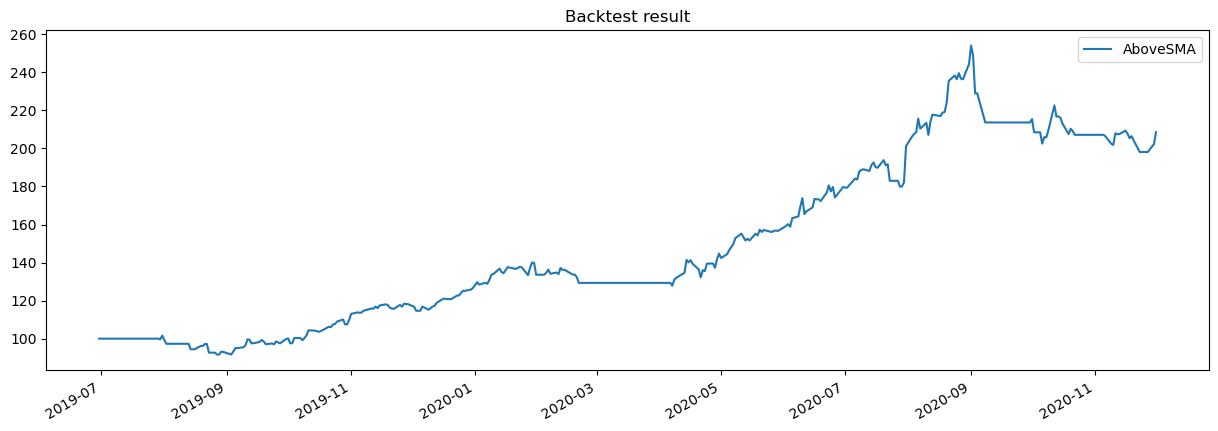

In [33]:
bt_result.plot(title='Backtest result');

* The line chart above shows how much the <font color='green'>beginning capital balance increases over time from a baseline of 100</font>
* Note that the <font color='green'>flat line areas</font> indicate periods when we <font color='green'>don't have any positions</font>, so the <font color='green'>trading account balance does not change</font>
* Overall, the strategy is <font color='green'>profitable</font> based on the backtest performed on the historical data

## Two types of trading strategies

| <font color='green'>Trend-following (momentum strategy)</font>| <font color='green'>Mean reversion</font>|
| --- | --- |
| Bet the price trend will continue in the same direction | Bet the price tends to reverse back towards the mean|
| Use trend indicators such as moving averages, ADX, etc., to construct trading signals |Use indicators such as RSI, Bollinger Bands, etc., to construct trading signals|

* Markets are <font color='green'>constantly moving in and out</font> of phases of <font color='green'>trending</font> and <font color='green'>mean reversion</font>
* Therefore, it's beneficial to develop strategies for both phases

## MA crossover strategy (trend-following)

#### <font color='green'>Philosophy: the trend is your friend</font>

* Involves two moving average indicators, one longer and one shorter
* We will use the EMA for this example, so this is a <font color='green'>Two EMA crossover</font>:
    * <font color='green'>Long signal:</font> the short-term EMA <font color='green'>crosses above</font> the long-term EMA, which suggests the <font color='green'>price is picking up momentum</font>
    * <font color='green'>Short signal:</font> the short-term EMA <font color='green'>crosses below</font> the long-term EMA, which suggests that the <font color='green'>price is losing momentum</font>

## Calculating the indicators

* First, let's calculate the indicators with the <font color='blue'>talib EMA function</font>
* Note that we use <font color='blue'>to_frame()</font> to save the result as a pandas DataFrame

In [34]:
# Calculate the indicators
EMA_short = talib.EMA(price_data['Close'], timeperiod=10).to_frame()
EMA_long = talib.EMA(price_data['Close'], timeperiod=40).to_frame()

## Constructing the signal

* We construct the signal by copying the EMA indicator DataFrame with the <font color='blue'>.copy()</font> method
* We <font color='green'>set the signal value to 0</font> for the <font color='green'>initial n periods that do not have enough data points for the EMA </font> 
* Then, we define the signal:
    * when the <font color='green'>short-term EMA value is larger than the long-term EMA value</font>, the signal is <font color='green'>1</font>, indicating a <font color='green'>long position</font>
    * when <font color='green'>short-term EMA is smaller than the long-term EMA</font>, the signal is <font color='green'>-1</font>, indicating a <font color='green'>short position</font>
* Note that <font color='green'>shorting a stock</font> essentially means <font color='green'>betting the price will go down</font>, and entails <font color='green'>selling borrowed shares</font>, and <font color='green'>later buying them back at market price</font>

In [35]:
# Create the signal DataFrame
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0

# Construct the signal
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

## Plotting the signal

* We can plot the signal with the price and EMA indicators together
* First use <font color='blue'>bt.merge()</font> to combine multiple DataFrames
    * It takes in several DataFrames and merges them into one based on the DataFrame index, in this case the Date 
* Then use the <font color='blue'>.columns()</font> attribute of the DataFrame to rename the data columns and create a plot 
* Since the signal has a different scale from the price and EMA data, define <font color='blue'>secondary_y</font> to the signal column to plot it on secondary y axis on the right

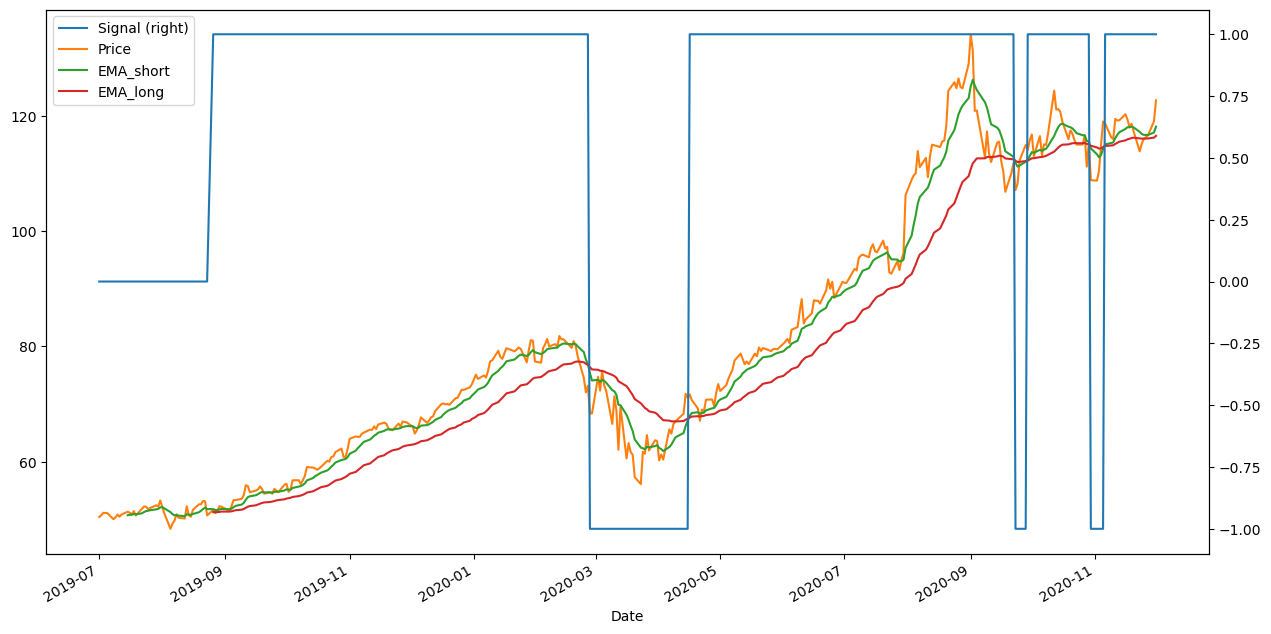

In [36]:
# Plot the signal, price, and MAs
combined_df = bt.merge(signal, price_data, EMA_short, EMA_long)
combined_df.columns = ['Signal', 'Price', 'EMA_short', 'EMA_long']
plt9 = combined_df.plot(secondary_y=['Signal'], figsize=(15, 8))

The chart above gives clear indications of where to take <font color='green'>long</font> or <font color='green'>short positions</font>

## Defining the strategy with the signal

* Now we are ready to implement the signal in the strategy
* Previously, we used algos <font color='blue'>SelectWhere</font> to build the signal
* Here, the signal is not constructed directly from the price comparison, so we will use another way provided by bt:
    * Call  <font color='blue'>WeighTarget</font> and pass the signal DataFrame
    * The signal value  <font color='green'>1</font>,  <font color='green'>-1</font> or  <font color='green'>0</font> will dictate which period we will have  <font color='green'>long positions</font>,  <font color='green'>short positions</font>, or  <font color='green'>no positions</font>

In [37]:
# Rename signal column, this is needed for the backtest to work
signal = signal.rename(columns={0:'Close'})

# Define the strategy
bt_strategy = bt.Strategy('EMA_crossover',
                         [bt.algos.WeighTarget(signal),
                         bt.algos.Rebalance()])

## Backtesting the signal based strategy

Now that we have the strategy defined, we can create and run a backtest to see how it performs

In [38]:
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



## Plotting the backtest results
Let's plot and review the backtest result

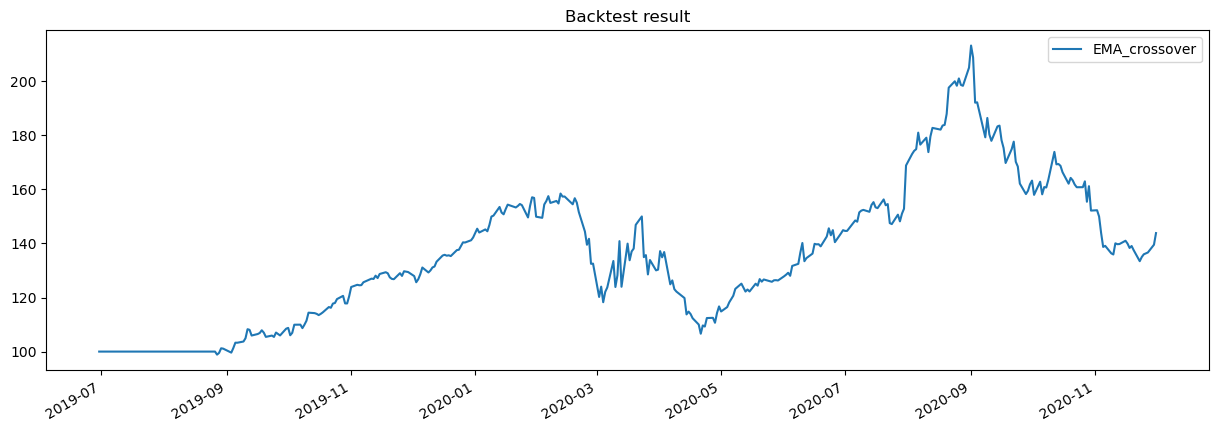

In [39]:
# Plot the backtest result
bt_result.plot(title='Backtest result');

Overall, the strategy is <font color='green'>profitable</font> based on the historical period backtested

## Mean reversion strategy 

#### <font color='green'>Philosophy: Buy the fear and sell the greed (buy the dip and sell the peak)</font>

## RSI-based mean reversion strategy

Let's look at an example of a mean-reversion strategy involving the RSI indicator:

*  <font color='green'>Short signal:</font> $RSI > 70$
    * suggests the  <font color='green'>asset is likely overbought</font> and the <font color='green'>price may soon reverse</font>
*  <font color='green'>Long signal:</font> $RSI < 30$
    * suggests the  <font color='green'>asset is likely oversold</font> and the  <font color='green'>price may soon rally</font>

## Calculating the indicator

* Let's calculate the indicators with the <font color='blue'>talib.RSI()</font> function
* Save the result as a DataFrame with <font color='blue'>.to_frame()</font>

In [40]:
# Note: We are using Apple stocks for this example

# Calculate the RSI
stock_rsi = talib.RSI(price_data['Close']).to_frame()

## Constructing the signal

* Now we can construct the signal
* First, create a signal DataFrame by copying the RSI indicator DataFrame
* Let's define: 
    * when the <font color='green'>RSI value is less than 30</font>, it suggests the <font color='green'>asset is likely approaching an oversold condition</font>,
        * set the <font color='green'>signal to 1</font> to enter a <font color='green'>long position</font>
    * Conversely, when the <font color='green'>RSI value is larger than 70</font>, it suggests the <font color='green'>asset is likely approaching an overbought condition</font>
         * set the <font color='green'>signal to -1</font> to enter a <font color='green'>short position</font>
    * If the <font color='green'>RSI value is in between</font>, set the <font color='green'>signal to 0</font>, indicating <font color='green'>no trade positions</font>

In [41]:
# Create the same DataFrame structure as RSI
signal = stock_rsi.copy()
signal[stock_rsi.isnull()] = 0

# Construct the signal
signal[stock_rsi < 30] = 1
signal[stock_rsi > 70] = -1
signal[(stock_rsi <= 70) & (stock_rsi >= 30)] = 0

## Plotting the signal

* To plot the signal with the price together, use <font color='blue'>bt.merge()</font> to combine multiple DataFrames, then call <font color='blue'>.plot()</font>
* Note that we don't merge the RSI indicator with the price since they are on different scales
    * recall that RSI is bounded between <font color='green'>0</font> to <font color='green'>100</font>
* Instead, we can place the RSI plot along with the signal plot using <font color='blue'>subplots</font> to observe where to take long or short trades based on RSI values

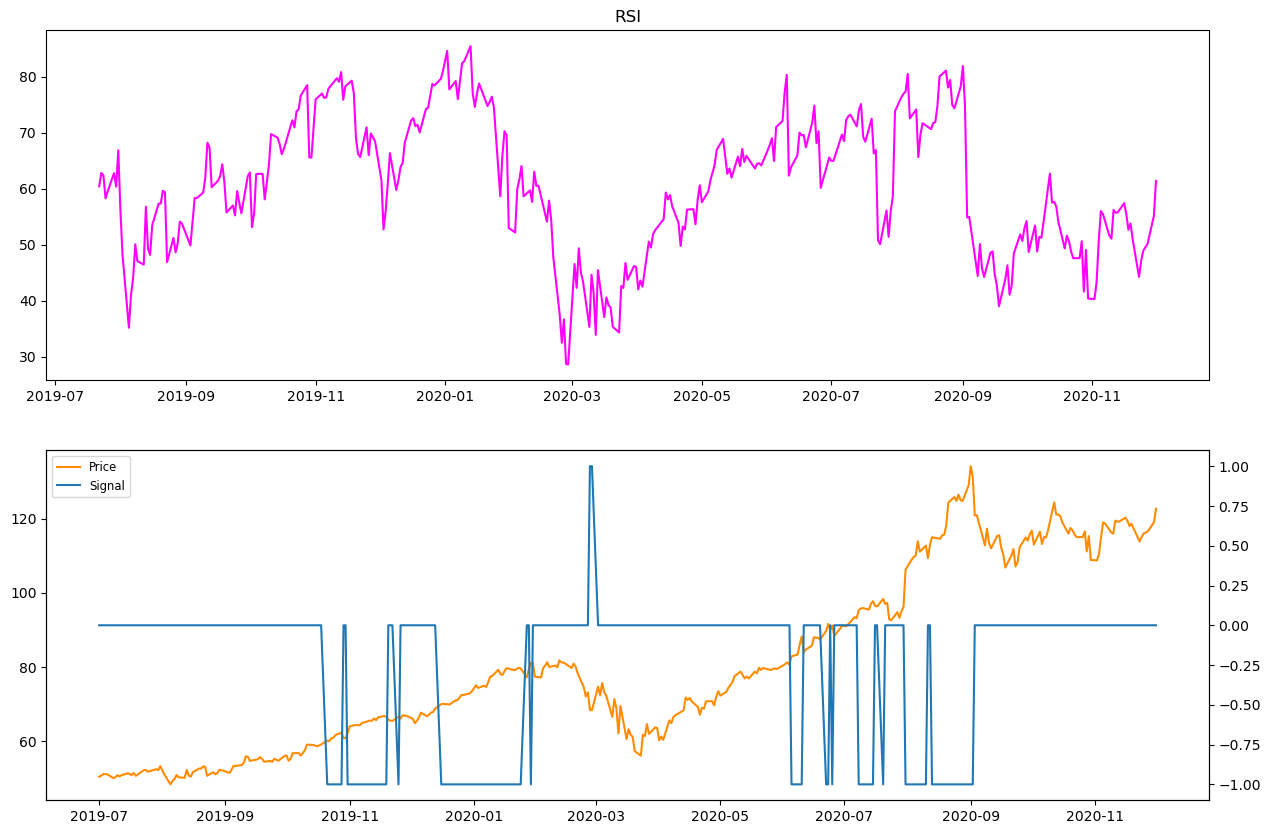

In [42]:
# Create subplots
fig, (ax5, ax6) = plt.subplots(2, figsize=(15, 10))

# Plot the RSI
ax5.plot(stock_rsi, color='magenta')
ax5.set_title('RSI')

# Merge data into one DataFrame
combined_df = bt.merge(signal, price_data)
combined_df.columns = ['Signal', 'Price']

# Plot the signal with the price
a, = ax6.plot(combined_df['Price'], color='darkorange', label='Price')
# Create seconday y axis for signal
ax7 = ax6.twinx()
b, = ax7.plot(combined_df['Signal'], label='Signal')
# Create new tuple object for legend
p = [a, b]
ax6.legend(p, [p_.get_label() for p_ in p],
           loc= 'upper left', fontsize= 'small');

## Defining the strategy with the signal

* Now we are ready to implement the signal in the strategy
* Like before, call algos <font color='blue'>WeighTarget</font> and pass in the signal DataFrame
* The signal value will dictate which period will have <font color='green'>long positions</font>,  <font color='green'>short positions</font>, or  <font color='green'>no positions</font>

In [43]:
# Rename signal column, this is needed for the backtest to work
signal = signal.rename(columns={0:'Close'})

# Define the strategy 
bt_strategy = bt.Strategy('RSI_MeanReversion',
                          [bt.algos.WeighTarget(signal),
                          bt.algos.Rebalance()])

## Backtesting the signal-based strategy
Now that we have the strategy defined, we create and run a backtest to see how it performs

In [44]:
# Create the backtest and run it
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



## Plotting the backtest result

Let's plot and review the backtest result 

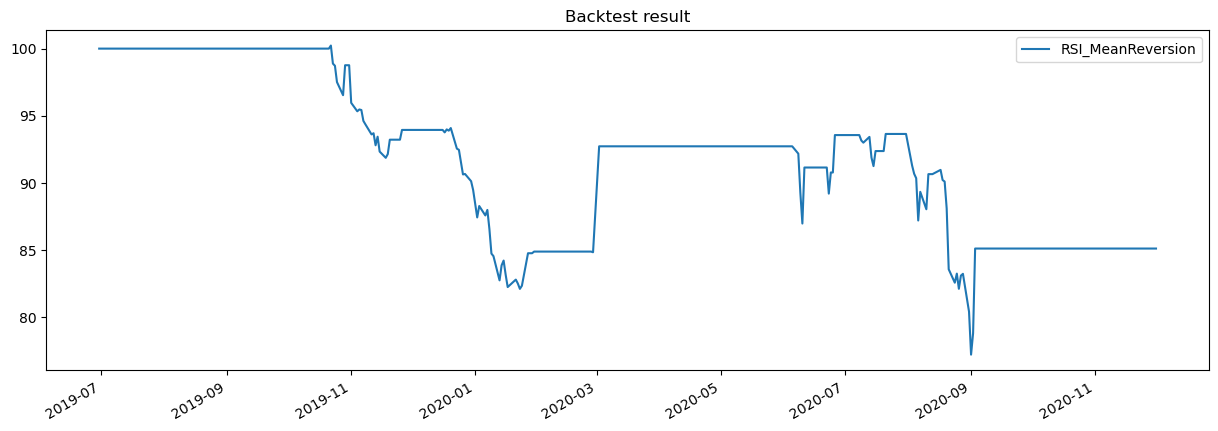

In [45]:
# Plot the backtest result
bt_result.plot(title='Backtest result');

* The resulting plot provides us with useful insights
* Since the <font color='green'>RSI-based mean reversion strategy</font> tries to <font color='green'>take advantage of temporary market imbalances</font>, it <font color='green'>tends to trade more frequently</font> than the <font color='green'>Moving Average (MA) strategies</font>
* Also, if the <font color='green'>RSI value does not indicate an overbought or oversold market condition</font>, <font color='green'>no trade is taken</font> so the <font color='green'>profit line is flat</font>
* Overall, the strategy is <font color='red'>not profitable</font> based on the historical period backtested

## Deciding the values of input parameters

* We have now built and backtested several trading strategies
* But when implementing a strategy, how do we determine the values of input parameters? 
    * For example, when we construct the signal based on <font color='green'>"$Price > SMA$"</font>, what is the SMA lookback period we should use? Can a 10, 20, or 50-period SMA result in a more profitable strategy?
* Solution: conduct  <font color='green'>strategy optimization</font> 
    * test a range of input parameter values to find the ones that give better strategy performance based on historical data

## Strategy optimization example

* Let's look at an example of performing strategy optimization
* Earlier in this chapter, we implemented a strategy based on a price and SMA comparison
* To find the SMA lookback period that can optimize the strategy performance, we want to run multiple backtests by varying the SMA timeperiod parameters on different runs
* Here we define a function <font color='blue'>signal_strategy</font> that packages the process of implementing the strategy
    * After <font color='blue'>def signal_strategy</font>, we can pass a number of parameters in a function header that our function will accept
    * We can pass the <font color='blue'>period</font> as a parameter to change the SMA lookback period
    * We can also pass the <font color='blue'>stock ticker</font>, <font color='blue'>start date</font>, and <font color='blue'>end date</font> to run backtests on different stocks and on different historical periods
    * Note that by specifying a value of a parameter in the header, we set a <font color='blue'>default</font> argument that will be used if an argument is not passed
        * For example, here we set the <font color='blue'>start</font> and <font color='blue'>end</font> parameters with default dates
    * Within the body of the function, our code can use the values these parameters take when the function is called
    * Lastly, we use the return keyword to return the backtest whenever the function is called

In [46]:
# Define function
def signal_strategy(ticker, period, name, start='2018-4-1', end='2020-11-1'):
    
    # Get the data and calculate SMA
    price_data = yf.download(ticker, start=start, end=end)
    price_data = price_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    sma = price_data.rolling(period).mean()
    
    # Define the signal-based strategy
    bt_strategy = bt.Strategy(name,
                             [bt.algos.SelectWhere(price_data > sma),
                             bt.algos.WeighEqually(),
                             bt.algos.Rebalance()])
    
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

## Strategy optimization example continued

* Now we can call the function several times to pass different SMA lookback parameters
* Each function will return a <font color='blue'>bt.Backtest()</font> 
* Call <font color='blue'>bt.run()</font> to run all the Backtests at once
* Plot the results in one chart for easy comparison

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide



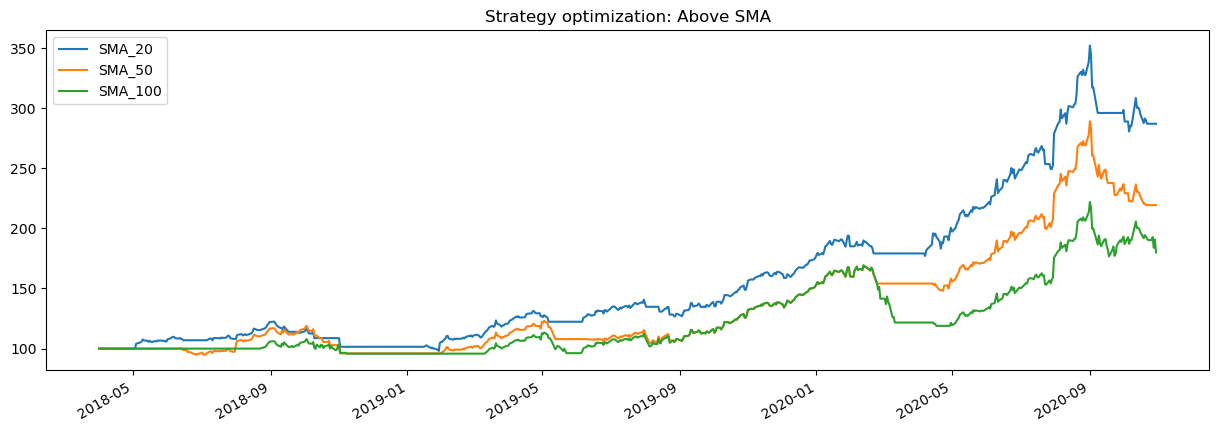

In [47]:
# Set ticker, here we use Apple stocks
ticker='aapl'

# Get SMAs with different lookback windows
sma20 = signal_strategy(ticker, period=20, name='SMA_20')
sma50 = signal_strategy(ticker, period=50, name='SMA_50')
sma100 = signal_strategy(ticker, period=100, name='SMA_100')

# Run all backtests and compare results
bt_results = bt.run(sma20, sma50, sma100)
bt_results.plot(title='Strategy optimization: Above SMA');

From the chart, we can see that using the <font color='blue'>20-period SMA</font> gives us the <font color='blue'>most profitable strategy</font> based on the historical period backtested

## What is a benchmak?

<font color='green'>Benchmark:</font> a standard or point of reference against which a strategy can be compared or assessed
* For example, a strategy that uses <font color='green'>signals to actively trade stocks</font> can use a <font color='green'>passive buy and hold strategy</font> as a benchmark
* A benchmark can also be chosen based on the<font color='green'> market segments</font> and <font color='green'>asset risk profiles</font>, like in these cases:
    * the <font color='green'>S&P 500 index</font> is often used as a benchmark for <font color='green'>US equity performance</font>
    * <font color='green'>US Treasuries</font> are used for measuring <font color='green'>bond risks and returns</font>

## Benchmarking example

* Continuing with the previous example, let's define a benchmark
* Instead of using a signal-based strategy to actively trade a stock, we will <font color='green'>passively hold the stock</font> and use its <font color='green'>performance as the benchmark</font>
* Define a separate <font color='blue'>function</font> to describe the benchmark
    * Use <font color='blue'>bt.algos.RunOnce()</font> to implement a passive strategy, i.e. <font color='green'>buy a stock at the beginning of the period</font> and <font color='green'>just hold until the end of the period</font>

In [48]:
# Define function
def buy_and_hold(ticker, name, start='2018-11-1', end='2020-12-1'):
    
    # Get the data
    price_data = yf.download(ticker, start=start, end=end)
    price_data = price_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name,
                             [bt.algos.RunOnce(),
                              bt.algos.SelectAll(),
                             bt.algos.WeighEqually(),
                             bt.algos.Rebalance()])
    
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

## Benchmarking example continued

* Now, call the function to create a <font color='blue'>bt.Backtest()</font>
* Like before, we can use <font color='blue'>bt.run()</font> to run multiple backtests and plot their results together

[*********************100%***********************]  1 of 1 completed


/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning:

divide by zero encountered in true_divide



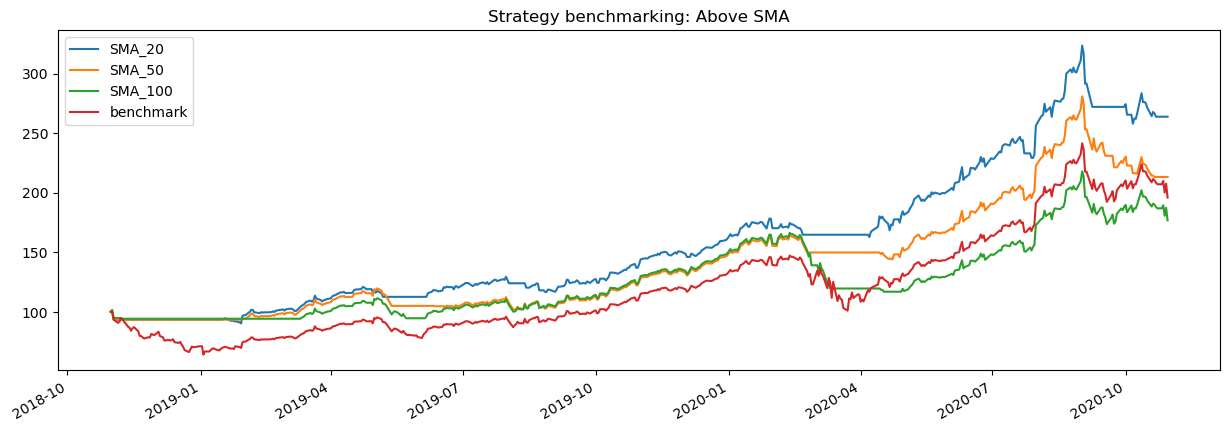

In [49]:
# Set benchmark
benchmark = buy_and_hold(ticker, name='benchmark')

# Run all backtests and compare results
bt_results = bt.run(sma20, sma50, sma100, benchmark)
bt_results.plot(title='Strategy benchmarking: Above SMA');

* The results are interesting
* They suggest that some  <font color='green'>active strategies outperformed the benchmark (SMA_20 and SMA_50) </font>, whereas some <font color='red'> underperformed (SMA_100)

# Chapter 4: <font color='green'>Performance Evaluation</font>